# Blood Pressure

Does blood pressure increase with age?

The `blood-pressure-usa.csv` file contains systolic blood pressure readings from 100 individuals sampled by the National Health and Nutrition Examination Survey (NHANES) in the U.S., with each person measured three times.

The `blood-pressure-yanomami.csv` file features systolic blood pressure data from 71 individuals of the Yanomami Tribe, who live in near-total isolation in the Amazon.

While the average American consumes about 3,500 mg of sodium daily (from salt), the Yanomami's intake is estimated to be less than 100 mg.

In [1]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'blood-pressure-usa.csv', 'blood-pressure-yanomami.csv', and 'linear_model.py'.

# from google.colab import files
# uploaded = files.upload()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from linear_model import LinearModel

df = pd.read_csv('blood-pressure-usa.csv')
df.head()

,age,bp1,bp2,bp3
0,46,122,129,122
1,43,113,116,111
2,29,102,107,105
3,12,100,102,102
4,9,112,138,94


In [2]:
df_remote = pd.read_csv('blood-pressure-yanomami.csv')
df_remote.head()

,age,bp
0,34,99
1,2,79
2,40,97
3,2,101
4,16,107


### Project Ideas

- Calculate the average blood pressure for each participant in the US dataset.

- Create a linear model for both the US and Yanomami datasets that predicts `bp` from `age`	. 

- Compare the best-fit lines and goodness of fit. What conclusions can you draw?

#### Confounding Variables

The Yanomami people participated in the INTERSALT study, which examined 10,000 individiuals across 52 populations in 32 countries, examining the link between salt consumption and systolic blood pressure. 

Does our data prove that salt intake causes the blood pressure differences between the US and Yanomami populations? What other confounding factors might exist?

In [9]:
# Calculate the average blood pressure for each participant in the US dataset.
df['avg_bp'] = df[['bp1','bp2','bp3']].mean(axis=1).round(2)
df.head()


,age,bp1,bp2,bp3,avg_bp
0,46,122,129,122,124.33
1,43,113,116,111,113.33
2,29,102,107,105,104.67
3,12,100,102,102,101.33
4,9,112,138,94,114.67


Text(0, 0.5, 'Blood pressure')

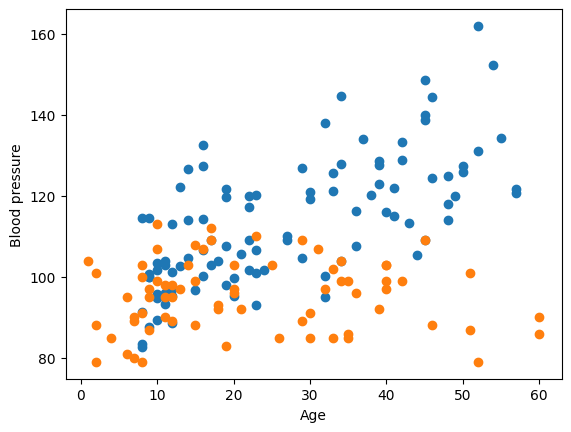

In [10]:
plt.scatter(df['age'],df['avg_bp'])
plt.scatter(df_remote['age'],df_remote['bp'])
plt.xlabel('Age')
plt.ylabel('Blood pressure')


LinearModel():
Slope: 0.7414548718646283
Intercept: 93.37026578787203
R-squared: 0.4719935832256321
LinearModel():
Slope: -0.004198440057105051
Intercept: 95.47465789198789
R-squared: 5.320136095354755e-05


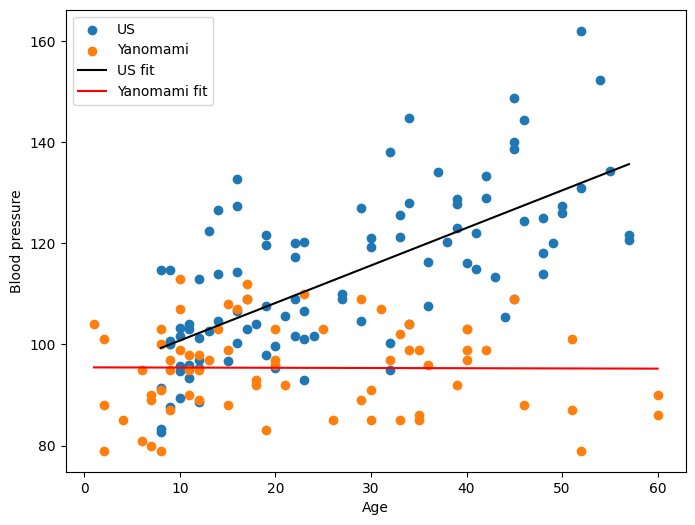

In [15]:
import numpy as np

# Linear model API
# Create a linear model for both the US and Yanomami datasets that predicts `bp` from `age`.

plt.figure(figsize=(8,6))
plt.scatter(df['age'], df['avg_bp'], label='US')
plt.scatter(df_remote['age'], df_remote['bp'], label='Yanomami')
plt.xlabel('Age')
plt.ylabel('Blood pressure')

# Fit and plot US model
linear_usa = LinearModel()
linear_usa.fit(df['age'].values, df['avg_bp'].values)
x_usa = np.linspace(df['age'].min(), df['age'].max(), 100)
y_usa = linear_usa.predict(x_usa)
plt.plot(x_usa, y_usa, color='black', label='US fit')
linear_usa.print_model_info()

# Fit and plot Yanomami model
linear_yamomi = LinearModel()
linear_yamomi.fit(df_remote['age'].values, df_remote['bp'].values)
x_y = np.linspace(df_remote['age'].min(), df_remote['age'].max(), 100)
y_y = linear_yamomi.predict(x_y)
plt.plot(x_y, y_y, color='red', label='Yanomami fit')
linear_yamomi.print_model_info()

plt.legend()
plt.show()

US:       slope=0.741, intercept=93.370, R^2=0.472
Yanomami: slope=-0.004, intercept=95.475, R^2=0.000


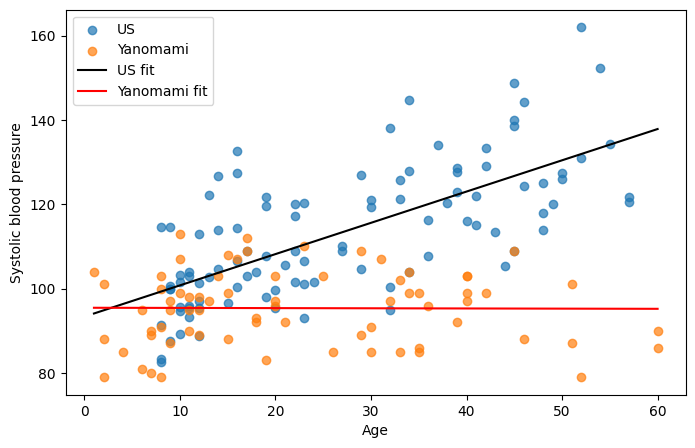

In [16]:
# Vergleich: Steigung, Achsenabschnitt und R^2 (Korrelation^2)
x_us, y_us = df['age'].values, df['avg_bp'].values
s_us, i_us = np.polyfit(x_us, y_us, 1)
r2_us = np.corrcoef(x_us, y_us)[0,1]**2

x_ya, y_ya = df_remote['age'].values, df_remote['bp'].values
s_ya, i_ya = np.polyfit(x_ya, y_ya, 1)
r2_ya = np.corrcoef(x_ya, y_ya)[0,1]**2

print(f"US:       slope={s_us:.3f}, intercept={i_us:.3f}, R^2={r2_us:.3f}")
print(f"Yanomami: slope={s_ya:.3f}, intercept={i_ya:.3f}, R^2={r2_ya:.3f}")

# Plotten
plt.figure(figsize=(8,5))
plt.scatter(x_us, y_us, label='US', alpha=0.7)
plt.scatter(x_ya, y_ya, label='Yanomami', alpha=0.7)
x_all = np.linspace(min(x_us.min(), x_ya.min()), max(x_us.max(), x_ya.max()), 200)
plt.plot(x_all, s_us * x_all + i_us, 'k-', label='US fit')
plt.plot(x_all, s_ya * x_all + i_ya, 'r-', label='Yanomami fit')
plt.xlabel('Age'); plt.ylabel('Systolic blood pressure')
plt.legend()
plt.show()


No — the data alone does not prove a causal effect of salt on blood pressure. This is cross-sectional/observational material: correlation ≠ causation.

Important reasons and possible confounding factors

Selection and sampling differences (who was selected and how?).
Age and gender distribution (demographic differences can explain BP).
BMI/body fat, physical activity, dietary factors other than salt (e.g., potassium).
Medication use (blood pressure medication), health care and diagnosis.
Smoking, alcohol, stress, sleep quality.
Genetic or ethnic differences in blood pressure regulation.
Differences in measurement protocols and equipment between studies/populations.
Environmental factors (e.g., climate, altitude, infection burden).
Small sample size in Yanomami → greater uncertainty; outliers can have a strong influence.